In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\USER\Downloads\Rainfall.csv")

In [3]:
pd.set_option('display.max_row',25)
pd.set_option('display.max_column',25) 
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.dtypes.value_counts()

float64    16
object      7
dtype: int64

In [5]:
df.shape

(8425, 23)

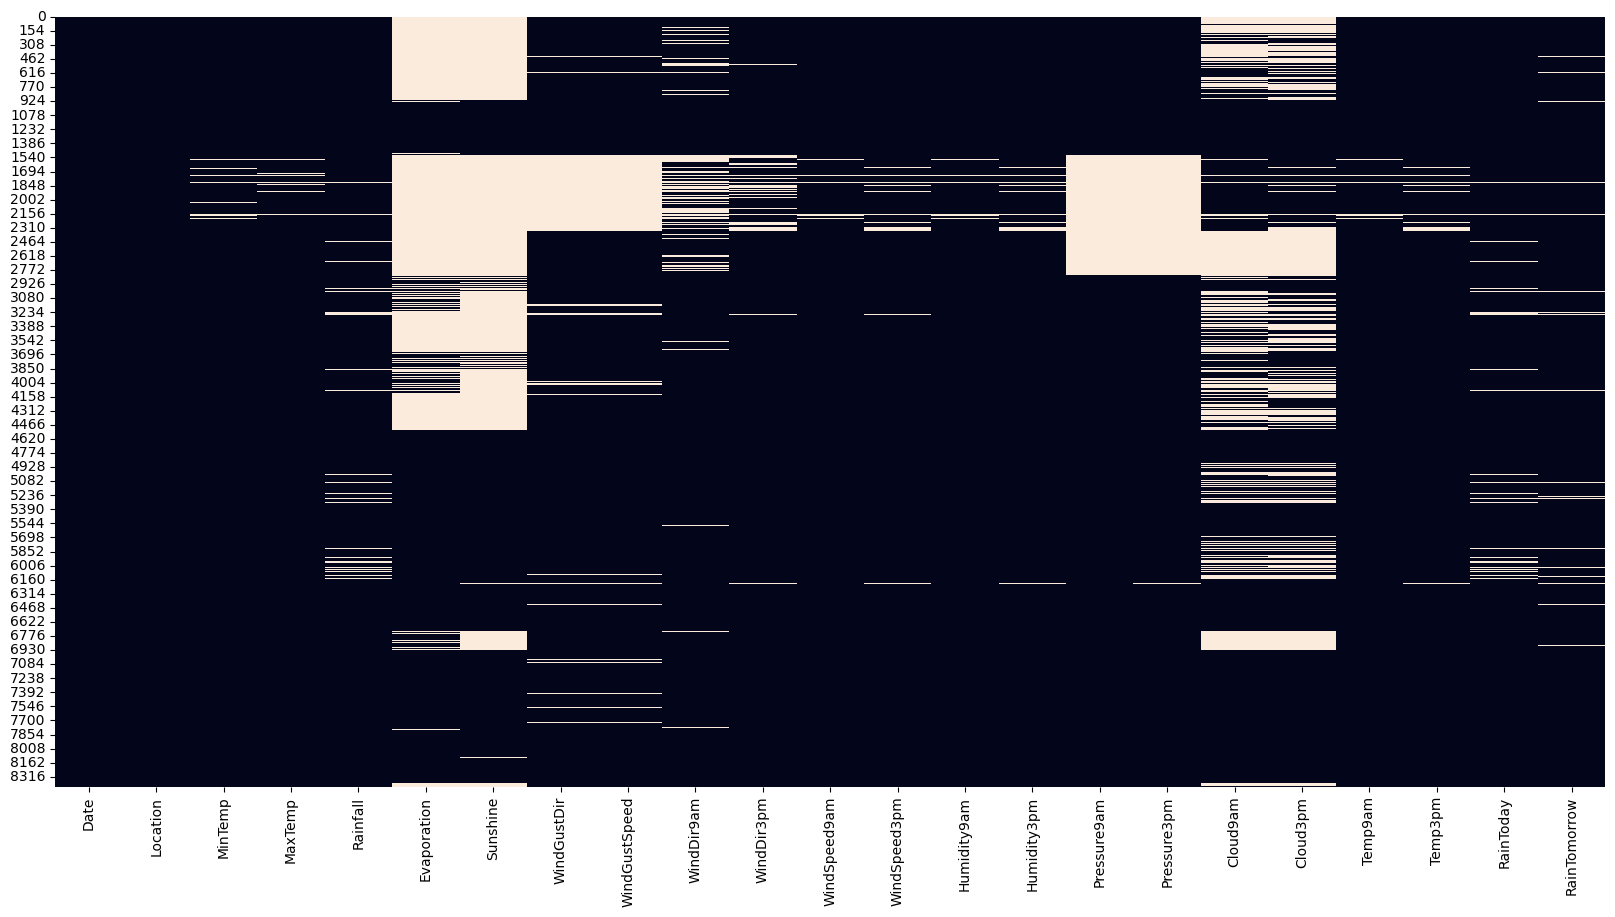

Sunshine         47.406528
Evaporation      41.685460
Cloud3pm         29.139466
Cloud9am         28.735905
Pressure3pm      15.572700
Pressure9am      15.537092
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
RainToday         2.848665
Rainfall          2.848665
RainTomorrow      2.836795
WindSpeed3pm      1.270030
Humidity3pm       1.210682
Temp3pm           1.139466
WindSpeed9am      0.902077
MinTemp           0.890208
MaxTemp           0.712166
Humidity9am       0.700297
Temp9am           0.664688
Location          0.000000
Date              0.000000
dtype: float64


In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)
plt.show()
print((df.isna().sum()/df.shape[0]*100).sort_values(ascending=False))

In [7]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(df["Next_Tmax"],label="Next_Tmax")
plt.plot(df["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

KeyError: 'Next_Tmax'

<Figure size 1440x480 with 0 Axes>

In [8]:
for col in ["Next_Tmax","Next_Tmin"]:
    plt.figure()
    sns.displot(df[col],kind='kde')
    plt.show()
print(df["Next_Tmax"].mean())
print(df["Next_Tmax"].std())
print(df["Next_Tmin"].mean())
print(df["Next_Tmin"].std())

KeyError: 'Next_Tmax'

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure()
sns.heatmap(pd.crosstab(df['Next_Tmax'],df['Next_Tmin']))
plt.show()

KeyError: 'Next_Tmax'

<Figure size 640x480 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_31896\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

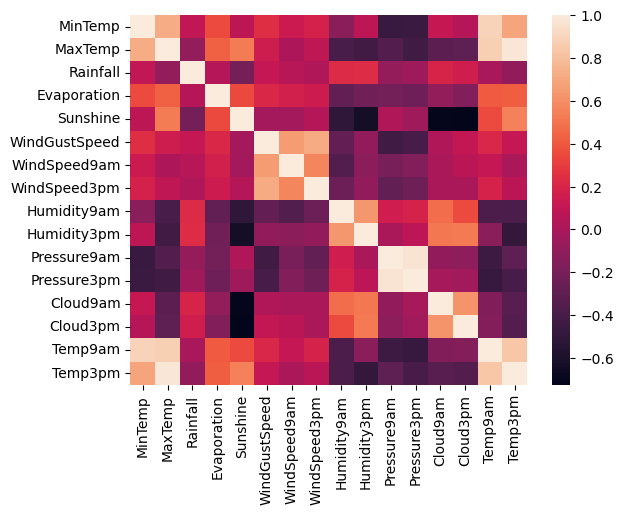

In [10]:
sns.heatmap(df.corr())

In [11]:
df = pd.read_csv(r"C:\Users\USER\Downloads\Rainfall.csv")
Save = df.copy()

In [12]:
def feature_engineering(df):
    df = df.drop(["Date"],axis=1)
    print(df.dtypes.value_counts())
    return(df)

In [13]:
def imputation(df):
    
    df = df.dropna(axis=0)
    return df

In [14]:
def encodage(df):
    return df

In [15]:
def preprocessing(df):
    df = imputation(df)
    df = encodage(df)
    df = feature_engineering(df)
    
    X = df.drop(['Next_Tmax','Next_Tmin'],axis=1)
    y_max = df["Next_Tmax"]
    y_min = df["Next_Tmin"]
    
    print(X.shape)
    print(y_max.shape)
    
    return X,y_max,y_min

In [16]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [17]:
X_train, y_min_train, y_max_train = preprocessing(trainset)
X_test, y_min_test, y_max_test = preprocessing(testset)

float64    16
object      6
dtype: int64


KeyError: "['Next_Tmax', 'Next_Tmin'] not found in axis"

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

In [19]:
reg_max = make_pipeline(StandardScaler(),
                    SGDRegressor(loss='squared_loss', penalty='l2', max_iter=1000, tol=1e-3))
reg_max.fit(X_train, y_max_train)

reg_min = make_pipeline(StandardScaler(),
                    SGDRegressor(loss='squared_loss', penalty='l2', max_iter=1000, tol=1e-3))
reg_min.fit(X_train, y_min_train)

cv_results_min = cross_validate(reg_min, X_train, y_min_train, cv=5, scoring=('r2', "neg_root_mean_squared_error"), return_train_score=True)
cv_results_max = cross_validate(reg_max, X_train, y_max_train, cv=5, scoring=('r2', "neg_root_mean_squared_error"), return_train_score=True)

print('Pour le Next_Tmin :')
print('Test RMSE :' , -cv_results_min['test_neg_root_mean_squared_error'].mean())
print('Test r2 :' , cv_results_min['test_r2'].mean())
print("Train RMSE :" , -cv_results_min['train_neg_root_mean_squared_error'].mean())
print("Train r2 :" , cv_results_min['train_r2'].mean())
print("*------------------------------------------*")
print('Pour le Next_Tmax :')
print('Test RMSE :' , -cv_results_max['test_neg_root_mean_squared_error'].mean())
print('Test r2 :' , cv_results_max['test_r2'].mean())
print("Train RMSE :" , -cv_results_max['train_neg_root_mean_squared_error'].mean())
print("Train r2 :" , cv_results_max['train_r2'].mean())

NameError: name 'X_train' is not defined

In [20]:
Next_Tmin_predict = reg_min.predict(X_test)
Next_Tmax_predict = reg_max.predict(X_test)

NameError: name 'reg_min' is not defined

In [21]:
plt.figure(figsize=(18,6))
plt.plot(y_min_test.to_numpy(),label="Next_Tmin")
plt.plot(Next_Tmin_predict,label="Next_Tmin_predict")
plt.legend()
plt.show()

plt.figure(figsize=(18,6))
plt.plot(y_max_test.to_numpy(),label="Next_Tmax")
plt.plot(Next_Tmax_predict,label="Next_Tmax_predict")
plt.legend()
plt.show()

NameError: name 'y_min_test' is not defined

<Figure size 1800x600 with 0 Axes>

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 130],
    'max_features': [3, 6],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [4, 8],
    'n_estimators': [1000, 500]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [23]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [24]:
grid_search.fit(X_train, y_max_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_max_test)

NameError: name 'X_train' is not defined

In [25]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_max_train)
base_accuracy = evaluate(base_model, X_test, y_max_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

NameError: name 'X_train' is not defined

In [26]:
grid_search.fit(X_train, y_min_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_min_test)

NameError: name 'X_train' is not defined

In [27]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_min_train)
base_accuracy = evaluate(base_model, X_test, y_min_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

NameError: name 'X_train' is not defined

In [28]:
Next_Tmax_TreeRegressor = RandomForestRegressor(random_state = 42, 
                                                bootstrap=True, max_depth=110, max_features=4, 
                                                min_samples_leaf=2, min_samples_split=4, n_estimators=900)
Next_Tmin_TreeRegressor = RandomForestRegressor(random_state = 42, 
                                                bootstrap=True, max_depth=70, max_features=6, 
                                                min_samples_leaf=2, min_samples_split=4, n_estimators=900)


print("---Next_Tmax---")
Next_Tmax_TreeRegressor.fit(X_train,y_max_train)
Next_Tmax_Accuracy = evaluate(Next_Tmax_TreeRegressor, X_test, y_max_test)

base_max_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_max_model.fit(X_train, y_max_train)
base_max_accuracy = evaluate(base_max_model, X_test, y_max_test)

print('Improvement of {:0.2f}%.'.format( 100 * (Next_Tmax_Accuracy - base_max_accuracy) / base_max_accuracy))
print("---------")
print("---Next_Tmin---")
Next_Tmin_TreeRegressor.fit(X_train,y_min_train)
Next_Tmin_Accuracy = evaluate(Next_Tmin_TreeRegressor, X_test, y_min_test)

base_min_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_min_model.fit(X_train, y_min_train)
base_min_accuracy = evaluate(base_min_model, X_test, y_min_test)

print('Improvement of {:0.2f}%.'.format( 100 * (Next_Tmin_Accuracy - base_min_accuracy) / base_min_accuracy))
print("---------")

---Next_Tmax---


NameError: name 'X_train' is not defined